## NutritionIX
As part of the project team's EDA - this notebok intends to explore the potential use of the NutitionIX, free access API for food ingredient and product nutrition information.

API Documentation here: https://developer.nutritionix.com/docs/v2

Application ID: `521f54bd`    
API Key: `25d5c30718d41ae5852789e886c1e110`

In [13]:
import requests
import json
import pandas as pd

In [108]:
url = 'https://trackapi.nutritionix.com/v2/natural/nutrients'
header = {'Content-Type':'application/json', 'x-app-id':'521f54bd', 'x-app-key':'25d5c30718d41ae5852789e886c1e110'}
body = '{\n \"query\": \"1 cup spinach\"\n }'

r = requests.post(url, headers=header, data=body)

In [29]:
body_2 = '{\n \"query\": \"Cantaloupe, One Medium\"\n }'

r_2 = requests.post(url, headers=header, data=body_2)
r_2.text

'{"foods":[{"food_name":"cantaloupe","brand_name":null,"serving_qty":1,"serving_unit":"medium","serving_weight_grams":310.5,"nf_calories":105.57,"nf_total_fat":0.59,"nf_saturated_fat":0.16,"nf_cholesterol":0,"nf_sodium":49.68,"nf_total_carbohydrate":25.34,"nf_dietary_fiber":2.79,"nf_sugars":24.41,"nf_protein":2.61,"nf_potassium":829.04,"nf_p":46.58,"full_nutrients":[{"attr_id":203,"value":2.6082},{"attr_id":204,"value":0.59},{"attr_id":205,"value":25.3368},{"attr_id":207,"value":2.0183},{"attr_id":208,"value":105.57},{"attr_id":209,"value":0.0932},{"attr_id":210,"value":13.5068},{"attr_id":211,"value":4.7817},{"attr_id":212,"value":5.8064},{"attr_id":213,"value":0},{"attr_id":214,"value":0.1242},{"attr_id":221,"value":0},{"attr_id":255,"value":279.9158},{"attr_id":262,"value":0},{"attr_id":263,"value":0},{"attr_id":268,"value":437.805},{"attr_id":269,"value":24.4053},{"attr_id":287,"value":0.1863},{"attr_id":291,"value":2.7945},{"attr_id":301,"value":27.945},{"attr_id":303,"value":0.65

In [30]:
mango = json.loads(r_2.text)

In [102]:
print(type(mango))
print(mango.keys())
print(type(mango['foods'][0]))
print(mango['foods'][0]['photo']['thumb'])

<class 'dict'>
dict_keys(['foods'])
<class 'dict'>
https://d2xdmhkmkbyw75.cloudfront.net/451_thumb.jpg


In [35]:
print("Product: ", mango['foods'][0]["food_name"])
print("Calories: ", mango['foods'][0]["nf_calories"])
print("Protein: ", mango['foods'][0]["nf_protein"])
print("Total Fat: ", mango['foods'][0]["nf_total_fat"])
print("Total Carbohydrates: ", mango['foods'][0]["nf_total_carbohydrate"])

Product:  cantaloupe
Calories:  105.57
Protein:  2.61
Total Fat:  0.59
Total Carbohydrates:  25.34


In [61]:
groc_string = 'Cantaloupe, One Medium'
body_temp = '{\n \"query\": \"%s"\n }' % groc_string
body_temp

'{\n "query": "Cantaloupe, One Medium"\n }'

In [130]:
from IPython.display import Image, display
from IPython.core.display import HTML

In [121]:
Image(url= "https://d2xdmhkmkbyw75.cloudfront.net/451_thumb.jpg")

In [133]:
def load_grocery(groc_string, groc_dict):
    body_temp = '{\n \"query\": \"%s"\n }' % groc_string
    r_temp = requests.post(url, headers=header, data=body_temp)
    d_temp = json.loads(r_temp.text)
    url_temp = d_temp['foods'][0]['photo']['thumb']
    
    groc_dict[d_temp['foods'][0]["food_name"]] = {'kcal':d_temp['foods'][0]["nf_calories"], 
                                                  'protein':d_temp['foods'][0]["nf_protein"],
                                                  'fat':d_temp['foods'][0]["nf_total_fat"],
                                                  'carb':d_temp['foods'][0]["nf_total_carbohydrate"],
                                                  'url': url_temp
                                                 }
    
    return display(Image(url= url_temp)), print(groc_string)

In [106]:
demo_dict = dict()
demo_string = "365 Everyday Value, Organic Ice Cream Sandwiches, 3.65 fl oz, 6 ct, (Frozen)"

In [134]:
load_grocery(demo_string, demo_dict)

365 Everyday Value, Organic Ice Cream Sandwiches, 3.65 fl oz, 6 ct, (Frozen)


(None, None)

In [78]:
demo_dict

{'ice cream sandwiches': {'carb': 38.43,
  'fat': 8.87,
  'kcal': 245.24,
  'protein': 4.44}}

In [103]:
def load_grocery_list(path_name, groc_dict):
    d = open(path_name)
    d_list = d.readlines()
    d.close()

    for line in d_list:
        load_grocery(line[:-1], groc_dict)

In [135]:
load_grocery_list('./demo_list.txt', demo_dict)

365 Everyday Value, Organic Ice Cream Sandwiches, 3.65 fl oz, 6 ct, (Frozen)


Ben & Jerrys Non-Dairy, P.B. & Cookies, 16 oz


Johnsonville, Classic Italian Meatballs, 24 oz (Frozen)


So Delicious Dairy Free Coconutmilk Creamer, French Vanilla, 16 fl oz


Annies Bunny Grahams, Chocolate, Graham Snacks, 7.5 oz Box


Organic Kale, 1 Bunch


Red Raspberries, 6 oz


365 Everyday Value, Roasted & Salted Deluxe Mixed Nuts, 16 oz


365 Everyday Value, Organic Garbanzo Beans, 15.5 oz


365 Everyday Value, Organic Tomato Basil Pasta Sauce, 25 oz


365 Everyday Value, Organic Coconut Milk, 13.5 oz


Fresh Tilapia Fillets, Farm-Raised, 12 oz


Annies, Organic Whole Milk Yogurt Tubes, Real Organic Berries & Bananas, 8 Count


Applegate, Natural Chicken Nuggets Family Size, 16oz (Frozen)


Medium Garlic, One Bulb


365 Everyday Value, Penne Rigate, 16 oz


365 Everyday Value, Organic Baby Spinach, 5 oz


Gardein Classic Meatless Meatballs, Protein Packed Goodness, Ready in 8 Minutes, 12.7 Ounce (Frozen)


Asparagus, 1 Bunch


Pepperidge Farm Goldfish Crackers, Cheddar, 30 oz carton


Annies Macaroni and Cheese, Pasta & Classic Cheddar Mac and Cheese, 6 oz Box


Rosarita Traditional Refried Beans, 16 oz


Organic Baby Carrots, 1 lb


Zucchini Squash, 1.5 lb


Tillamook, Medium Cheddar Cheese,  8 oz


Cantaloupe, One Medium


Just BARE Chicken, Hand-Trimmed Boneless, Skinless Chicken Breast Fillets, Family Pack, 2 lb


Kashi GOLEAN, Breakfast Cereal, Crunch, Non-GMO Project Verified, 21.3 oz


Mission, 10 Inch Burrito Flour Tortillas, 8 ct, 20 oz


Oroweat 100% Whole Wheat Bread, 1lb and 8oz


Garden of Eatin, Red Hot Blues Spicy All Natural Tortilla Chips, 16 oz


Red Seedless Grapes, 2 lb


365 Everyday Value Trail Mix, Treasure Hunt, 16 oz


Almond Breeze Dairy Free Almondmilk, Unsweetened Vanilla 64 oz


Green Bell Pepper, One


Organic Yellow Onion, Large


Strawberries, 1 lb


Kashi GOLEAN, Breakfast Cereal, Chocolate Crunch, Vegan, Non-GMO Project Verified, 12.2oz


Taylor Farms Organic Baby Kale, 5 oz Clamshell


Bagged Hass Avocados, 4ct Small


365 Everyday Value, Smoked Turkey Breast, 7 oz


Sunset Greenhouse One Sweet Cherry Tomatoes, 1 Pint


Bananas, 1 bunch (min. 5 ct.)


In [94]:
demo_df = pd.DataFrame.from_dict(demo_dict)

In [95]:
demo_df.head()

,almond,asparagus,baby kale,baby spinach,bananas,ben and jerrys,burrito,cantaloupe,cheddar cheese,cherry tomatoes,...,smoked turkey breast,strawberries,tilapia fillets,tomato,tortilla chips,trail mix,whole milk yogurt,whole wheat bread,yellow onion,zucchini squash
carb,0.27,0.62,7.98,5.15,26.95,47.70,56.32,25.34,7.01,0.66,...,15.28,34.84,0.00,4.78,307.45,202.41,7.92,96.87,12.99,18.30
fat,0.68,0.03,0.57,0.55,0.39,34.67,16.39,0.59,75.55,0.03,...,5.95,1.36,9.02,0.25,93.80,143.81,5.53,7.94,0.24,2.45
kcal,7.71,3.30,39.69,32.60,105.02,532.86,433.80,105.57,916.27,3.06,...,222.26,145.15,435.46,22.14,2140.99,2181.87,103.70,571.54,56.32,102.06
protein,0.27,0.36,2.69,4.05,1.29,7.49,16.94,2.61,51.87,0.15,...,26.79,3.04,88.96,1.08,32.21,64.01,5.90,28.24,1.74,7.76


In [115]:
from PIL import Image
import requests
from io import BytesIO
from matplotlib.pyplot import imshow
import numpy as np
% matplotlib inline

In [98]:
url_img = "https://d2xdmhkmkbyw75.cloudfront.net/451_thumb.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

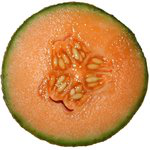

In [99]:
img